### Your details

Your Name: Pierre-Louis JALLERAT

Erasmus Student

Your ID number: 21181659

# Task 1 - Probability Distributions


##Problem using a random continous variable

###Description of the problem:

One of my friend is supposed to join me at my home between 4 and 6. What is the probability that she will be there between 4:30 and 5.

### Approach

x is random variable which represent the hour of day when my friend joins me.

x follow uniform distribution with values between a and b. a = 4 and b = 6
We can calculate the probability that x is betwen 4:30 and 5 with the probability uniform distribution function 


In [51]:
#The probability that x is between 4.5 and 5, knowing that x can be between 4 and 6
f = (5 - 4.5)/(6 - 4)
print("The probability that my friend will be there between 4:30 and 5 is ",f)

#Standart deviation
standartDeviation = math.sqrt(math.pow(6 - 4, 2) / 12)
print("The standart deviation is",standartDeviation, "hours")

The probability that my friend will be there between 4:30 and 5 is  0.25
The standart deviation is 0.5773502691896257 hours


Remarks: The probability seems to be correct. The arrival time of my friend is totally random so the probability to see her during a certain slot of 30 min over a 2 hours slot is logically 25%

###Comparation with an experiment

For the rest of the exercie I will work with minutes instead of hour to facilitate the calculation and, later, the plotting. So, for example 4:00 become 240 min and 6:00 become 360 min.
First, I will create a method to simulate the arrival time of friend. Then I will repeat the event multiple time. If the arrival time is between 270 (4:30) and 300 (5:00), my event is successful. Finally by dividing the number of success per the number of try I will find the experimental probability.

I will also store the result of each experiments to calculate the standart deviation later

In [49]:
import random
import math
#Simulation of time of arrival. This function return a random number between 240 and 360
def simulateArrivalTime(seed):
  random.seed(seed)
  return 240 + random.random() * 120

nbOfSuccess = 0
arrivalTime = 0
nbOfTest = 100000
#Array to store the result of each experiment
results = []

#The experimentation is repeated multiple time with a loop
for i in range(nbOfTest):
  arrivalTime = simulateArrivalTime(i)
  results.append(arrivalTime)
  #If the arrival time is between 270 (4:30) and 300(5:00), the experiment is a success
  if arrivalTime >= 270 and arrivalTime <= 300:
    nbOfSuccess += 1

experimentalProbability = nbOfSuccess/nbOfTest
print("The experimental probability that my friend will be there between 4:30 and 5 is ", experimentalProbability)

The experimental probability that my friend will be there between 4:30 and 5 is  0.25169


We can notice that the experimental probability of 0.25169 is consistent with the theoretical probability of 0.25

Then I will calculate the Sample Standart Deviation by using the following formula : https://www.thoughtco.com/calculate-a-sample-standard-deviation-3126345

In [52]:
import math

#First, I iterate throught the result array to find the mean
def sampleStandartDeviation(data, n): 
  mean = 0
  for x in data:
    mean += x

  mean = mean / len(data)
  print("The experimental mean for", nbOfTest, "tries is:", mean)

  #Then I apply the Sample Standart Deviation formua
  result = 0
  for x in data:
    result += math.pow(x - mean, 2)

  result = result / (nbOfTest - 1)
  result = math.sqrt(result)
  return result

print("The experimental Sample Standart Deviation for", nbOfTest, "tries is:",
  sampleStandartDeviation(results, nbOfTest))

The experimental mean for 100000 tries is: 299.930373375438
The experimental Sample Standart Deviation for 100000 tries is: 34.5605895960957


The arrival time is a random value between 240 and 360 so theoretical mean is 300. We can notice that the experimental mean of 299.93 is consistent with the theoretical mean.

We can also notice that the sample standart deviation of 34.56 minutes is consistent with the theoretical stand deviation of an half hour

###Plotting

The aim of the plot is the show the probabily that my friend will be at my home between 240 min and x min. For each minute x between 240 min and 360 min, I will calculate the probability that my friend will be at my home between 240 and x. 

The probability in minutes to see my friend at my place between 240 min and x min 


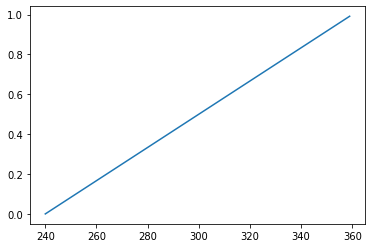

In [53]:
#The probability uniform distribution function I will use has parameter changing, it is the upper bound. 
def uniform(d):
  return (d - 4*60)/(6*60 - 4*60)

#I store in a array the probability I will find for each minutes between 240 and 360.
probaArray = []

#In the loop, I use distribution function to find the probability that x is between 240 and x (with 240<=x<=360) 
for d in range(4*60, 6*60):
  probaArray.append(uniform(d))

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(range(4 * 60, 6*60))
ypoints = np.array(probaArray)

print("The probability in minutes to see my friend at my place between 240 min and x min ")

plt.plot(xpoints, ypoints)
plt.show()

##Problem using a random discrete variable

###Description of the problem:

What is the probability that a least a quart of people drinking beer at the Stables Club, are having a pinte of Guiness ?

According to the Irish Post, a quarter of all the beer sell in Ireland are Guiness.
The probability p that someone take a pinte of Guiness is: p = 0.25.
In general, 80 people are taking a beer at the Stables Club each night : n = 80.


### Approach

We can apply a binomial distribution of 80 trials, x success with 20<=x<=80 and 0.25 chances of success

Probability mass function: 𝑓(x, n, p) =  f(x, 80, 0.25) is the probability of having x person drinking a Guiness at the Stables Club.

We are looking for the probability that at least 20 out 80 people drink a Guiness which mean:
P(x =  20 || x = 21 || x = 22 || ... || x = 80).

Seing others people drinking a Guiness or not doesn't affect the choice of the new costumer. So we can apply the following formula:

P(x =  20 || x = 21 || x = 22 || ... || x = 80)
=  P(x =  20) + P (x = 21) || + P (x = 22) || ... || + P (x = 80)


### Manual Calculations

With a "for" loop we repeat the calculation of the probability of a binomial distribution for x between 20 et 80.
At each loop we sum the probability of having x success in a variable called probabilityTotal

In [54]:
import math

#Fonction to calculate the probability of a binomial distribution
def binomial(x,n,p):
  return (math.factorial(n) / (math.factorial(x) * math.factorial(n - x))) * math.pow(p, x) * math.pow(1 - p, n - x)

probability = 0
probabilityTotal = 0
p = 0.25
n = 80
quarter = int(n / 4)

#Sum of the probability of the binomial distribution for x between 20 and 80
for x in range(quarter,n + 1):
  probability = binomial(x,n,p)
  probabilityTotal = probabilityTotal + probability

print("The probability that a least a quarter of people drinking beer at the Stables Club, are having a pinte of Guiness is ", probabilityTotal)

def standartDeviation(n,p):
  return math.sqrt((n * p) * (1 - p))

print("The standart deviation is ",standartDeviation(n, p))


The probability that a least a quarter of people drinking beer at the Stables Club, are having a pinte of Guiness is  0.5428362539407244
The standart deviation is  3.872983346207417


###Comparation with an experiment

First, I will create a method to simulate the experiment of 80 people ordering a beer. Then I will repeat the experiment multiple time. If 20 people or more order a Guiness, my experiment is succesfull. Finally by dividing the number of success per the number of tries, I will find the experimental probability of having at least a quarter of people ordering a Guiness.
For each experiment, I will store the number of people drinking Guiness in an array to calculate the Sample Standard Deviation later.

In [55]:
import random

#Simulate 80 people ordering a beer with 0.25 probability of having a Guiness. The value return is number of Guiness ordered.
def peopleDrinkingGuiness(seed):
  random.seed(seed)
  counter = 0
  for i in range(n):
    if random.random() <= p:
      counter += 1
  return counter

In [56]:
sumProba = 0
nbOfTest = 1000
nbSucces = 0
#Array to store the result of each experiment
results = []
nbOfPeopleDrinkingGuiness = 0

for x in range(nbOfTest):
  nbOfPeopleDrinkingGuiness = peopleDrinkingGuiness(x)
  results.append(nbOfPeopleDrinkingGuiness)
  if nbOfPeopleDrinkingGuiness >= quarter:
    nbSucces += 1

probaOfSucces = nbSucces / nbOfTest
print("The experimental probability of having at least 20 people out 80 drinking a Guiness is", probaOfSucces)


The experimental probability of having at least 20 people out 80 drinking a Guiness is 0.547


We can notice that the experimental probability of 0.547 is consistent with the theoretical probability of 0.542

In this part I will calculate the Sample Standart Deviation using the function we create in the random continous value section

In [57]:
print("The experimental Sample Standart Deviation for", nbOfTest, "tries is:",
  sampleStandartDeviation(results, nbOfTest))

The experimental mean for 1000 tries is: 20.031
The experimental Sample Standart Deviation for 1000 tries is: 3.7791958564384096


The theoretical mean is n*p = 80 * 0.25 = 20 people. We can notice that the experimental mean of 20.031 is consistent with the theoretical mean.

###Ploting

I want to plot the probaility that there are less than x people take a Guiness. Each probability will be store in an array.
The first element of my array will be the P(X >= 1), my second will be P(X >=2), ... , until P(X >=80)

We know that:

P(X >= x) = P(X >= x+1) + P(X = x)

P(X >= 80) = P(X = 80)

P(X >= 79) = P(X >= 80) + P(X = 79)

P(X >= 78) = P(X >=79) + P(X = 78)

...


P(X >= 2) = P(X >= 3) + P(X = 2)

P(X >= 1) = P(X >= 2) + P(X = 1)

To calculate the probabilities, I will use a loop with a variable x which decrease from 80 to 0. At each iteration I will calculate P(X = x) and add it to my previous result P(X >= x+1) to find P(X >= x)

For example, I will first calculate P(X = 80) to find P(X >= 80) , then I will calculate P(X = 79) and add it to my previous result to find P(X >= 79).

After the loop, I will reverse my array so P(X >= 1) will be the first element and P(X >= 80) will the last element.



The probability that there are less than x people take a Guiness


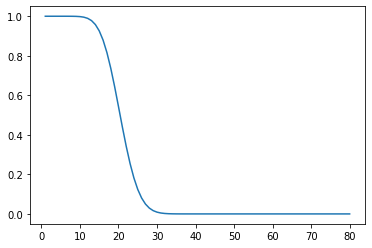

In [58]:
probability = 0
#I store all the probabily I want to display in this array
probaArray = []
probabilityTotal = 0
p = 0.25
n = 80

for x in range(0,n):
  x = 80 - x
  probability = binomial(x,n,p)
  #I add probabilty of the previous element P(X >= x+1) to current probability P(X = x) -> P(X >= x) = P(X >= x+1) + P(X = x) 
  probabilityTotal = probabilityTotal + probability
  #I store the probability  P(X >= x)
  probaArray.append(probabilityTotal)

#I reverse the array in order start by P(X >= 1) and finish by P(X >= 80)
probaArray.reverse()
print("The probability that there are less than x people take a Guiness")

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(range(1, 81))
ypoints = np.array(probaArray)

plt.plot(xpoints, ypoints)
plt.show()